In [1]:
%matplotlib inline

In [241]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import interact, interact_manual
from tqdm.notebook import tqdm
from time import sleep

# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5

In [3]:
rad = lambda x: x/180*np.pi

In [242]:
import importlib
import two_d_tracer
importlib.reload(two_d_tracer)

<module 'two_d_tracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/two_d_tracer.py'>

# Mirrors

In [4]:
scene = two_d_tracer.Scene([two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
                           [two_d_tracer.SurfaceReflective([0,0],[-np.cos(rad(45/2)),-np.sin(rad(45/2))]),
                           two_d_tracer.SurfaceReflective([0,-5], [0,1])])

In [5]:
scene.rays

[Ray([-10.   -2.5], [1. 0.]),
 Ray([-10.    -1.25], [1. 0.]),
 Ray([-10.   0.], [1. 0.]),
 Ray([-10.     1.25], [1. 0.]),
 Ray([-10.    2.5], [1. 0.])]

In [6]:
scene.run(margin=1e-10)

<IPython.core.display.Javascript object>


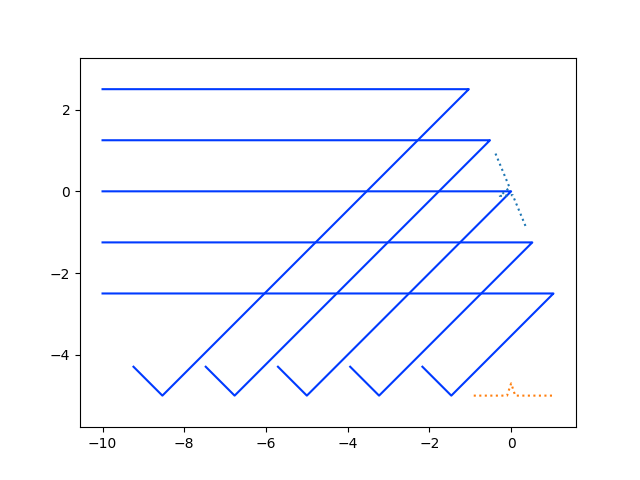

(-10.551776695296637, 1.5873106012293765, -5.375000000000001, 2.875)

In [7]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Refracting surfaces

In [8]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-10, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [9]:
scene.run()

<IPython.core.display.Javascript object>


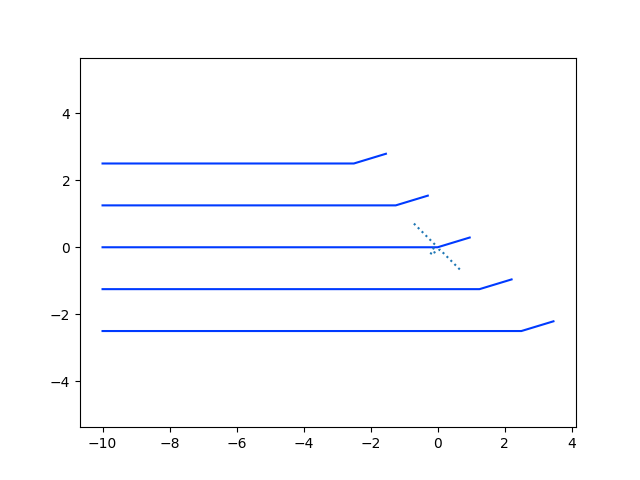

(-10.672847144899352, 4.129790042886396, -2.764513811559352, 3.054790042746397)

In [10]:
fig, ax = plt.subplots()
scene.plot(ax)    
ax.axis("equal")

In [11]:
scene.rays

[Ray([ 3.4569429  -2.20972377], [0.9569429  0.29027623]),
 Ray([ 2.2069429  -0.95972377], [0.9569429  0.29027623]),
 Ray([0.9569429  0.29027623], [0.9569429  0.29027623]),
 Ray([-0.2930571   1.54027623], [0.9569429  0.29027623]),
 Ray([-1.5430571   2.79027623], [0.9569429  0.29027623])]

In [12]:
scene.rays[0].angle

0.2945154851081369

In [13]:
# Compare to Snell's (algebra in Xournal)
rad(45) - np.arcsin(1/1.5*np.sin(rad(45)))

0.29451548510813697

# A glass slab

In [14]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,-0.5]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [-1, 0], None, 1, 1.5),
                two_d_tracer.Surface([2,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [15]:
scene.rays[0].angle

-0.4636476090008061

In [16]:
np.arcsin(1/1.5*np.sin(scene.rays[0].angle))

-0.30274595162300433

In [17]:
scene.step()
scene.propagate(1e-14)
print(scene.rays[0].angle)
scene.step()
scene.propagate(1e-14)
scene.step()

-0.30274595162300433


<IPython.core.display.Javascript object>


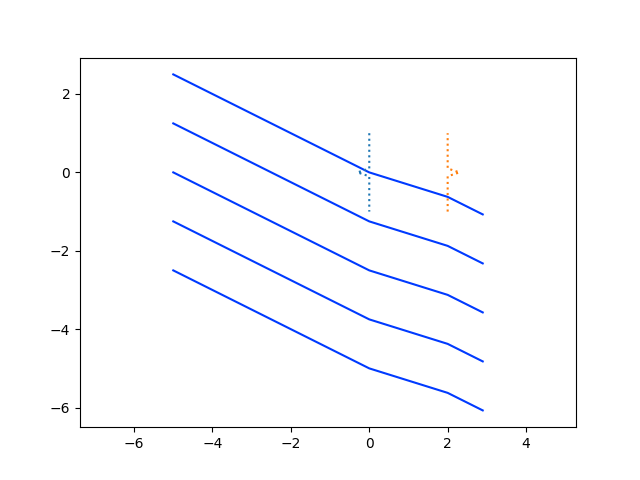

(-5.3947213595499965,
 3.289148550549921,
 -6.500504075207105,
 2.9285954321527194)

In [18]:
fig, ax = plt.subplots()
scene.plot(ax)   
ax.axis("equal")

In [19]:
scene.rays[0].angle

-0.463647609000806

# Retroreflector

In [20]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0.1,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,2], [1, 1], None, 1, 1.5),
                two_d_tracer.Surface([0,-2], [1, -1], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [21]:
scene.run()

<IPython.core.display.Javascript object>


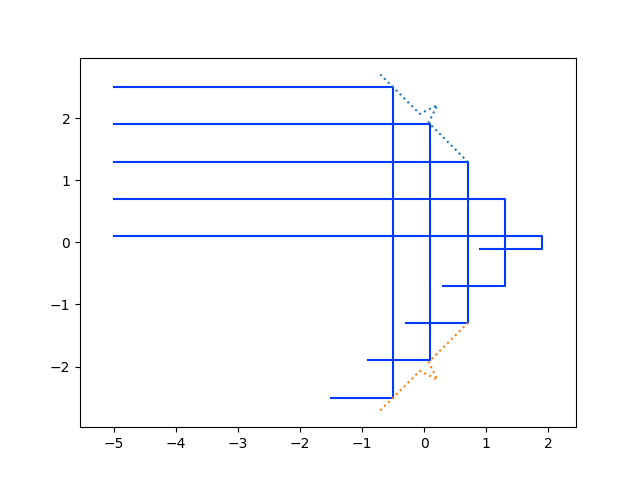

(-5.345, 2.244999999999999, -2.9778174593052023, 2.9778174593052023)

In [22]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [23]:
scene.rays

[Ray([ 0.9 -0.1], [-1.  0.]),
 Ray([ 0.3 -0.7], [-1.  0.]),
 Ray([-0.3 -1.3], [-1.  0.]),
 Ray([-0.9 -1.9], [-1.  0.]),
 Ray([-1.5 -2.5], [-1.  0.])]

# Testing Total Internal Reflection

In [24]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [np.cos(y),np.sin(y)]) for y in np.linspace(0,np.pi/4,30)] + [two_d_tracer.Ray([-1, np.arcsin(1/1.5)], [np.cos(np.arcsin(1/1.5)),np.sin(np.arcsin(1/1.5))],600)],
    "objects": [two_d_tracer.Surface([0,0], [1, 0], None, 1, 1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [25]:
# Critical angle
np.arcsin(1/1.5)*180/np.pi

41.810314895778596

In [26]:
# Three of the angles tested are above the critical angle, those, are reflected
np.linspace(0,np.pi/4,30)*180/np.pi

array([ 0.        ,  1.55172414,  3.10344828,  4.65517241,  6.20689655,
        7.75862069,  9.31034483, 10.86206897, 12.4137931 , 13.96551724,
       15.51724138, 17.06896552, 18.62068966, 20.17241379, 21.72413793,
       23.27586207, 24.82758621, 26.37931034, 27.93103448, 29.48275862,
       31.03448276, 32.5862069 , 34.13793103, 35.68965517, 37.24137931,
       38.79310345, 40.34482759, 41.89655172, 43.44827586, 45.        ])

In [27]:
scene.run()

<IPython.core.display.Javascript object>


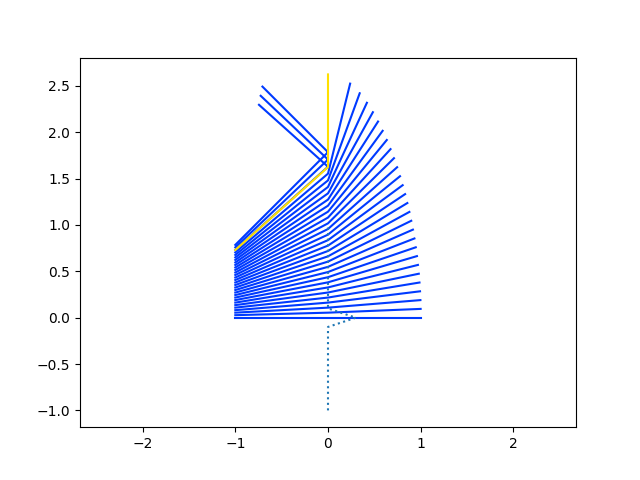

(-1.10000000001, 1.10000000021, -1.181207742371344, 2.8053625897982264)

In [28]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Ray canvas

In [29]:
canvas = two_d_tracer.RayCanvas([0,-3], [0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.Surface([0,0], [1, 1], None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [30]:
scene.run()

In [31]:
canvas

RayCanvas([0, -3], [0. 1.]): [2.5, 1.2499999999999996, 6.66133814775094e-16, -1.2499999999999991, -2.4999999999999987]

<IPython.core.display.Javascript object>


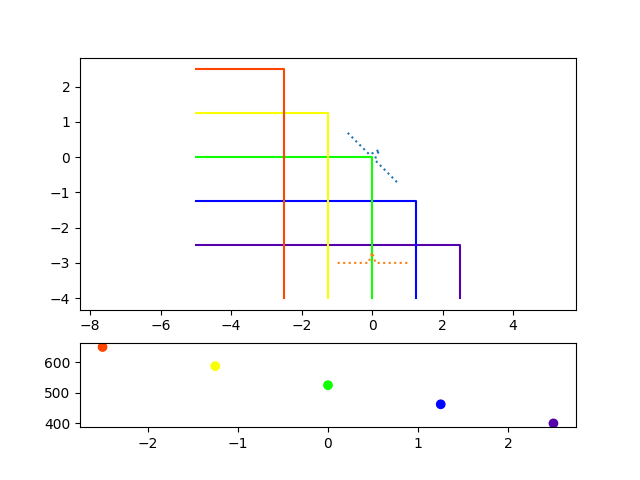

In [32]:
fig, ax = plt.subplots(2, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[1].scatter(canvas.points, canvas.wavelengths, c=canvas.c)

# Sphere

In [33]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5),two_d_tracer.SphereReflective([8,0], 2.5, None, 1, 1.5),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [34]:
scene.run()
scene.propagate(2)

<IPython.core.display.Javascript object>


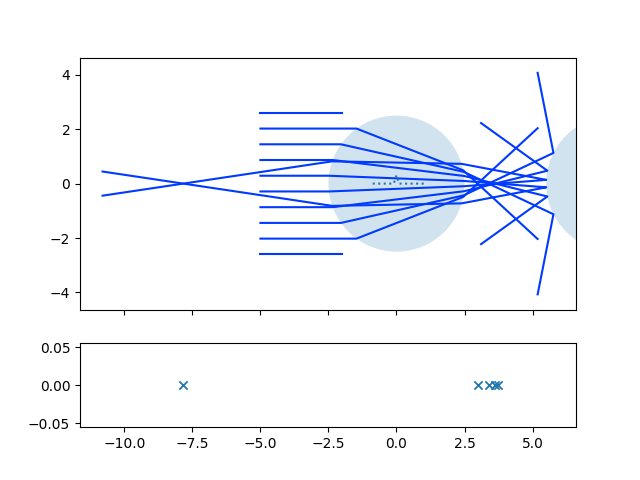

(-11.630301494360825, 6.596707329560326, -4.476850968607872, 4.476850968607868)

In [35]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus in the sphere

In [36]:
canvas = two_d_tracer.RayCanvas([0,0],[0,1])
n2 = 3
# two_d_tracer.ReflectiveSphere([8,0], 2.5, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1, y], [1,0]) for y in np.linspace(-0.1,0.1, 50)],
    "objects": [two_d_tracer.Sphere([2.5,0], 2.5, [rad(90), rad(-90)], 1, n2),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [37]:
scene.run()

<IPython.core.display.Javascript object>


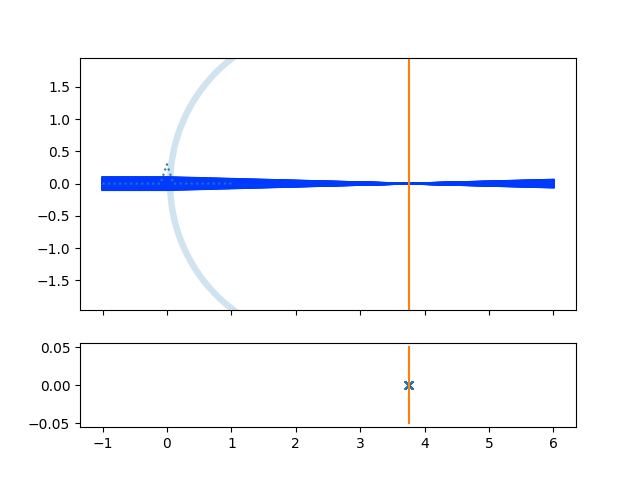

In [38]:
fig, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(3,1)})
scene.plot(ax[0])
ax[1].plot(canvas.points, [0 for p in canvas.points], "x")
ax[0].axis("equal")

# Focus for a single spherical surface in the paraxial approximation, rays colimated:
f = (n2 * 2.5 / (n2-1))
ax[0].plot([f,f], [-2.5,2.5])
ax[1].plot([f,f], [-0.05,0.05])

# Limits

## Mirrors

In [39]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,1], 2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [40]:
scene.run()

<IPython.core.display.Javascript object>


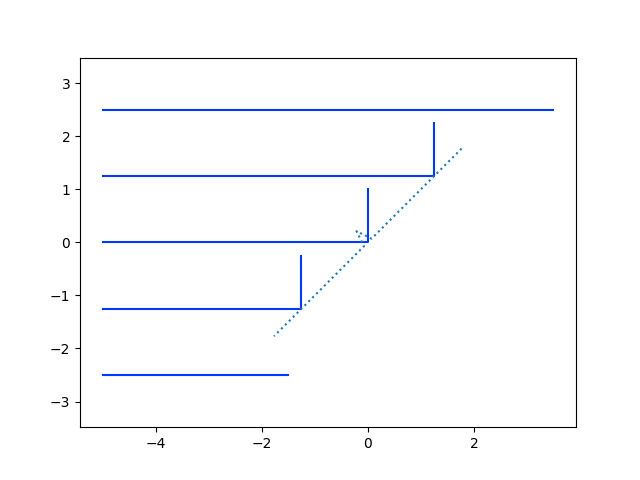

(-5.42500000001, 3.92500000021, -2.75, 2.75)

In [41]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

## Refractive planes

In [42]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0.3]) for y in np.linspace(-1.5,1.5, 11)],
    "objects": [two_d_tracer.Surface([-1,1], [-1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([1,1], [1,1], np.sqrt(2), 1, 1.3),
                two_d_tracer.Surface([0,0], [0,-1], 2, 1, 1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [43]:
scene.run()

<IPython.core.display.Javascript object>


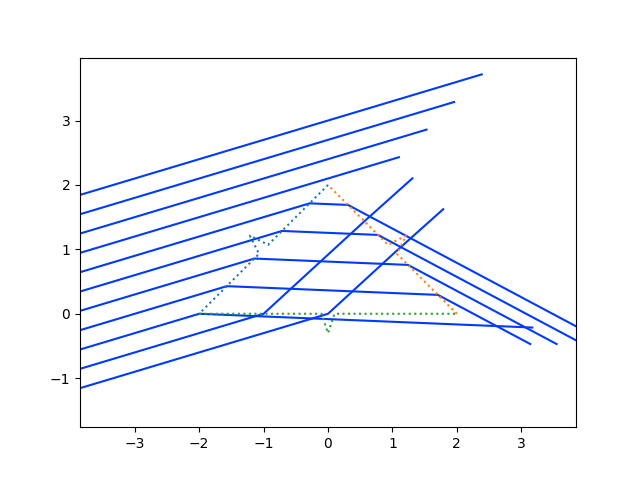

(-2.5, 2.5)

In [44]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")
ax.set_xlim(-2.5,2.5)

## Spheres

In [45]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-2.6,2.6, 10)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, [rad(150), rad(-150)], 1, 1.5),
               two_d_tracer.SphereReflective([4,0], 2.5, [rad(-50), rad(50)])]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [46]:
scene.run()

<IPython.core.display.Javascript object>


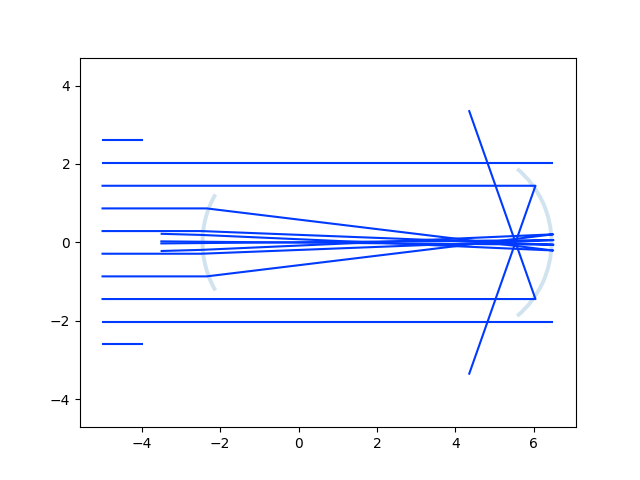

(-5.574965282633034,
 7.0742709352937165,
 -3.6824830157951975,
 3.682483015795196)

In [47]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# The lensmaker equation

$$\frac{1}{f}=(n-1)\left(\frac{1}{R_1}-\frac{1}{R_2}\right)$$ for a think lens. This doesn't quite work, so let's try $$\frac{1}{f} = (n-1) \left( \frac{1}{R_1} - \frac{1}{R_2} + \frac{(n-1)d}{n R_1 R_2} \right),$$
then the distance from the end of the lens to the focus is given as
$$\mbox{BFD} = f \left( 1 - \frac{ (n-1) d}{n R_1} \right),$$
which is taken from https://en.wikipedia.org/wiki/Focal_length.

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


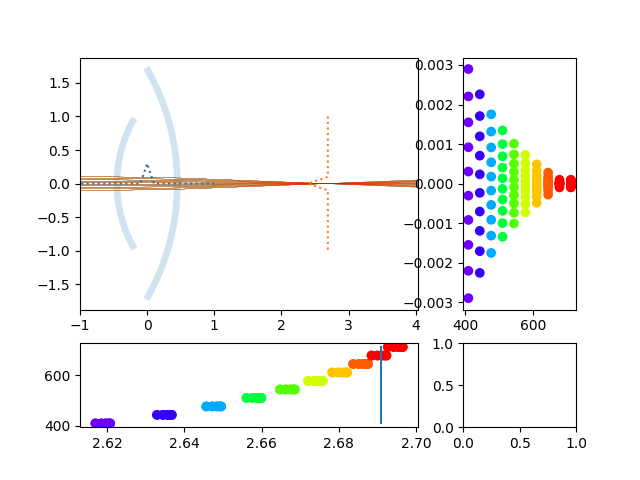

interactive(children=(FloatSlider(value=1.5, description='n', max=4.5, min=-1.5), FloatSlider(value=2.0, descr…

In [124]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

@interact
def draw(n=1.5, R1=2., R2=-2., d=1.):
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(-0.1,0.1, 20)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], true_color=False)
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].plot(canvas.points, [0 for p in canvas.points], "x")
    ax[1].plot([0 for p in canvas.points], canvas2.points, "x")
    ax[2].plot([ffdc,ffdc], [-1, 1])
    ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Wavelength to rgb testing

<IPython.core.display.Javascript object>


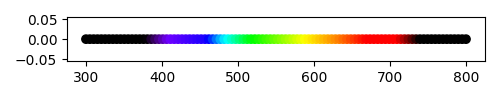

In [49]:
wvl = np.linspace(300, 800, 100)
w = [two_d_tracer.nm_to_rgb(x) for x in wvl]

fig, ax = plt.subplots(figsize=(5,1))
ax.scatter(wvl, np.zeros(wvl.size), c=w)
plt.tight_layout()

# Rainbow prism

In [50]:
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.Surface([-np.sin(prism_angle),np.cos(prism_angle)], [-np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([np.sin(prism_angle),np.cos(prism_angle)], [+np.cos(prism_angle),np.sin(prism_angle)], 1, 1, n_glass),
                two_d_tracer.Surface([0,0], [0,-1], 2*np.sin(prism_angle), 1, n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [51]:
scene.run(announce_steps=True)

Step 0
Step 1
Step 2
Step 3


<IPython.core.display.Javascript object>


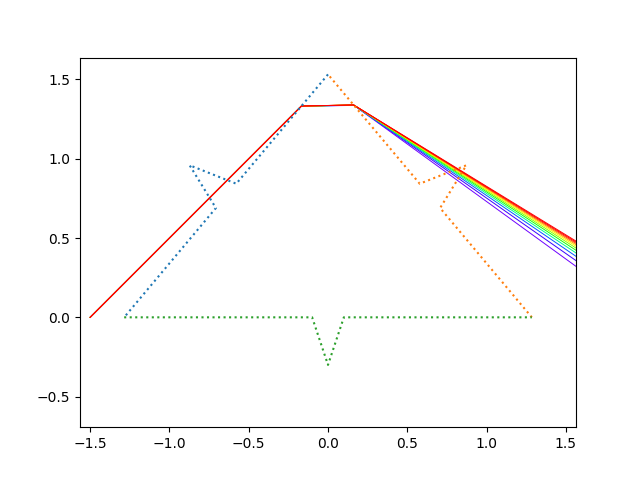

(-1.0, 1.0)

In [52]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")
ax.set_xlim(-1,1)

In [53]:
scene.rays

[Ray([ 2.81695318 -0.5869939 ], [ 0.80959136 -0.5869939 ]),
 Ray([ 2.89500638 -0.57309213], [ 0.81949095 -0.57309213]),
 Ray([ 2.9568246  -0.56235585], [ 0.82689534 -0.56235585]),
 Ray([ 3.0070811  -0.55380811], [ 0.83264433 -0.55380811]),
 Ray([ 3.04878555 -0.54683854], [ 0.83723809 -0.54683854]),
 Ray([ 3.0839888  -0.54104287], [ 0.84099501 -0.54104287]),
 Ray([ 3.11414563 -0.53614168], [ 0.84412801 -0.53614168]),
 Ray([ 3.14031988 -0.53193532], [ 0.84678499 -0.53193532]),
 Ray([ 3.16330851 -0.52827732], [ 0.84907189 -0.52827732]),
 Ray([ 3.18372042 -0.5250578 ], [ 0.85106657 -0.5250578 ]),
 Ray([ 3.20202871 -0.52219283], [ 0.85282744 -0.52219283])]

# Chromatic aberration

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


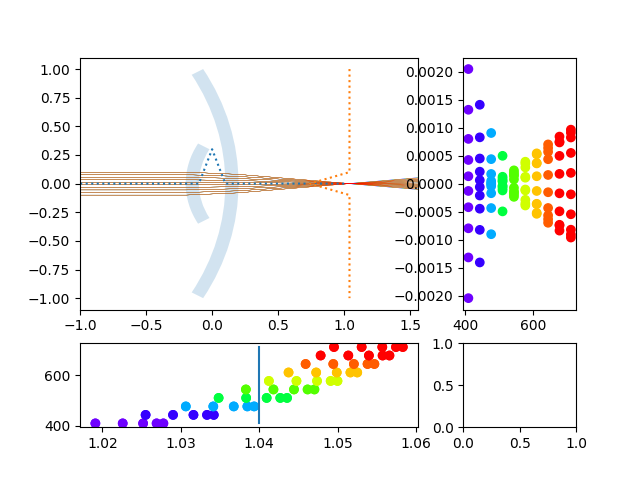

interactive(children=(FloatSlider(value=1.514, description='n', max=1.5295687672239824, min=1.5128024728723604…

In [125]:
def f(n, R1, R2):
    return 1 / ((n-1)*(1/R1-1/R2))

def f(n, R1, R2, d):
    return 1 / ((n-1)*(1/R1 - 1/R2 + ((n-1)*d)/(n*R1*R2)))

def ffd(f, n, R1, R2, d):
    return f*(1-(n-1)*d/(n*R1))

fig, ax = plt.subplots(2, 2, gridspec_kw={"height_ratios":(3,1), "width_ratios": (3,1)})
ax = ax.flatten()

canvas = None

@interact(n=(1.5128024728723604, 1.5295687672239824, 0.005))
def draw(n=1.514, R1=2., R2=-2., d=1.):
    global canvas
    fc = f(n, R1, R2, d)
    ffdc = ffd(fc, n, R1, R2, d) + d/2
    canvas = two_d_tracer.RayCanvas([0,0],[0,1])
    canvas2 = two_d_tracer.RayCanvas([ffdc,0],[-1,0])
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0], wl) for wl in np.linspace(410,710, 10) for y in np.linspace(-0.1,0.1,10)],
        "objects": [two_d_tracer.Sphere([R1-d/2,0], R1, [rad(150), rad(-150)], 1, n_glass),
                    two_d_tracer.Sphere([R2+d/2,0], -R2, [rad(-30), rad(30)], 1, n_glass), canvas, canvas2]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    scene.propagate(2)
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()
    scene.plot(ax[0], ray_kwargs={"lw":.1})
#     ax[0].plot([ffdc,ffdc], [-1, 1])
    ax[2].scatter(canvas.points, canvas.wavelengths, c=canvas.c)
    ax[1].scatter(canvas2.wavelengths, canvas2.points, c=canvas2.c)
    ax[2].plot([ffdc,ffdc], [410, 710])
#     ax[0].axis("equal")
    ax[0].set_xlim(-1, 1.5*ffdc)
    print(ffdc)

# Reflection momentum calculation

## Plane

In [55]:
mirror = two_d_tracer.SurfaceReflective([0,0], [1, 1], None)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+2.5)*50)) for y in np.linspace(-2.5,2.5, 5)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [56]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.00980751 0.        ]


In [57]:
scene.run()

<IPython.core.display.Javascript object>


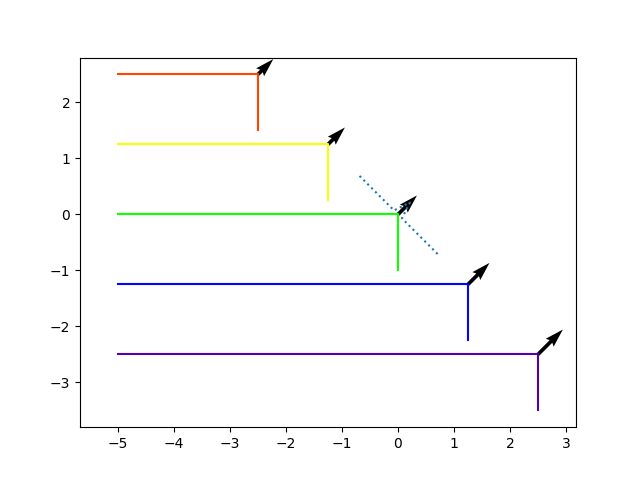

(-5.375, 2.875, -3.80000000021, 2.80000000001)

In [58]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [59]:
# The momentum change observed by the plane
mirror.momenta

[array([0.0025, 0.0025]),
 array([0.00216216, 0.00216216]),
 array([0.00190476, 0.00190476]),
 array([0.00170213, 0.00170213]),
 array([0.00153846, 0.00153846])]

In [60]:
# Total change of mirror momentum
np.sum(mirror.momenta, axis=0)

array([0.00980751, 0.00980751])

In [61]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 2.17770541e-18 -9.80751326e-03]


In [62]:
# Change in total photon momentum
final-initial

array([-0.00980751, -0.00980751])

In [63]:
# Change of momentum for the entire system:
np.sum(mirror.momenta, axis=0) + final - initial
# Woo, the system has conserved momentum!

array([0., 0.])

## Sphere

In [10]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0,2.49, 5)],
    "objects": [two_d_tracer.SphereReflective([0,0],2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

<IPython.core.display.Javascript object>


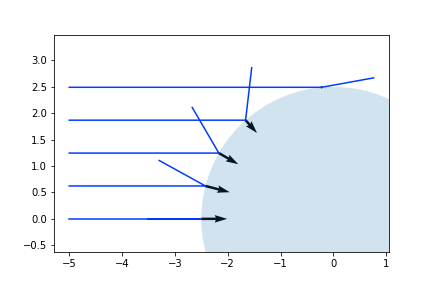

In [11]:
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")
plt.show()

In [12]:
scene.momentum

array([ 0.01344741, -0.00539028])

# Refraction momentum calculation

## Surface

In [64]:
surface1 = two_d_tracer.Surface([2,0], [1,1], 5*np.sqrt(2), 1, 1.2)
surface2 = two_d_tracer.Surface([-2,0], [-1,1], 2*np.sqrt(2), 1, 1.2)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y+1.5)*50)) for y in np.linspace(-1.5,1.5, 5)],
    "objects": [surface1, surface2]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [65]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.01066038 0.        ]


In [66]:
scene.run()

<IPython.core.display.Javascript object>


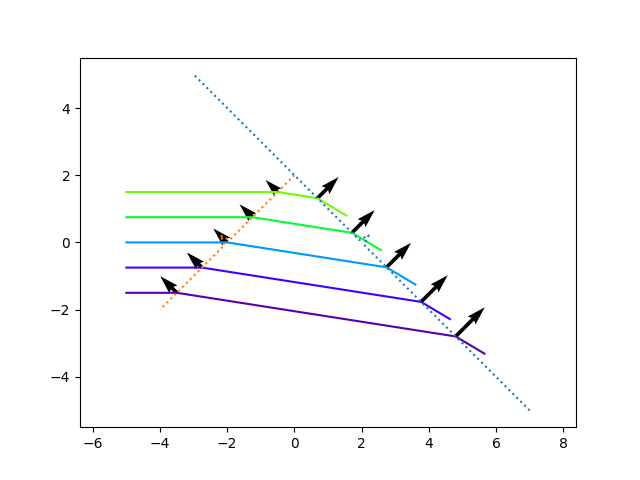

(-5.6, 7.6, -5.5, 5.5)

In [67]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [68]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 0.00915482 -0.00546196]


In [69]:
# Change in total photon momentum
final-initial

array([-0.00150556, -0.00546196])

In [70]:
np.sum(scene.momenta, axis=0)

array([0.00150556, 0.00546196])

## Sphere

In [71]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*200)) for y in np.linspace(0,1.5, 5)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [72]:
# Initial momentum of the photons
initial = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(initial)

[0.00945202 0.        ]


In [73]:
scene.run()

<IPython.core.display.Javascript object>


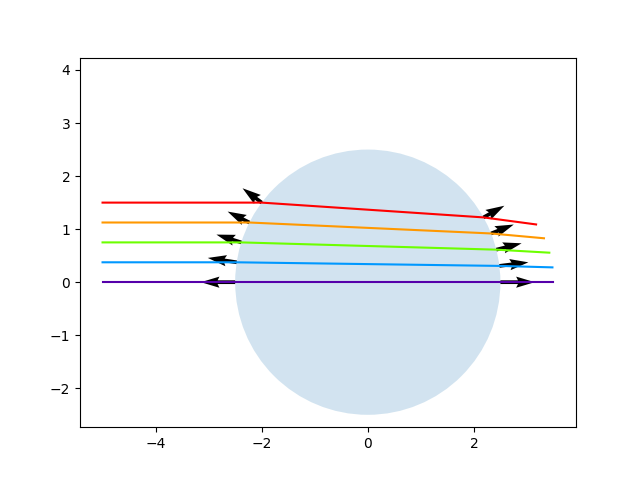

(-5.42500000001, 3.92500000021, -0.07500000000000001, 1.575)

In [74]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [75]:
# Final momentum of the photons
final = np.sum([1/ray.wavelength*ray.dir for ray in scene.rays], axis=0)
print(final)

[ 0.00942906 -0.00049589]


In [76]:
# Change in total photon momentum
final-initial

array([-2.29523806e-05, -4.95888506e-04])

In [77]:
np.sum(scene.momenta, axis=0)

array([2.29523806e-05, 4.95888506e-04])

## Sphere stability

In [236]:
sc_dsc = {
#     "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(2,-2, 2**10+1)],
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in linspace(-2,2,20000)],
    "objects": [two_d_tracer.SphereReflective([0,0],2.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

0.000200010000500025


<IPython.core.display.Javascript object>


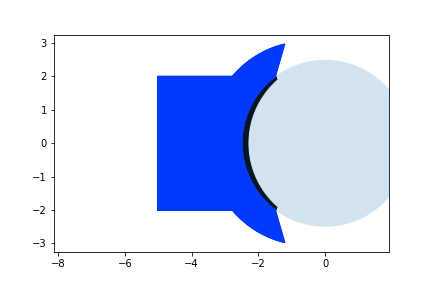

In [215]:
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")
plt.show()

In [235]:
np.sum(scene.momenta, axis=0)

array([6.73786152e+01, 6.06415959e-15])

In [237]:
scene.momentum

array([6.73786152e+01, 2.51534904e-17])

In [220]:
linspace(-2,2,1001)

0.004


array([-2.   , -1.996, -1.992, ...,  1.992,  1.996,  2.   ])

## np.linspace issues

0.004004004004004004


<IPython.core.display.Javascript object>


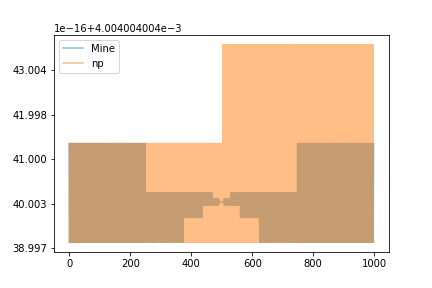

In [243]:
ar = linspace(-2,2,1000)
br = np.linspace(-2,2,1000)
fig, ax = plt.subplots()
ax.plot(ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

0.001001001001001001


<IPython.core.display.Javascript object>


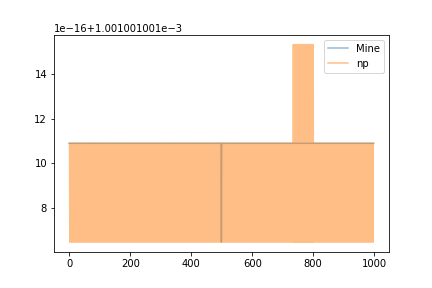

In [245]:
# Does reasonably well with ranges at the same order of magnitude
ar = linspace(2,3,1000)
br = np.linspace(2,3,1000)
fig, ax = plt.subplots()
ax.plot(ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

0.001


<IPython.core.display.Javascript object>


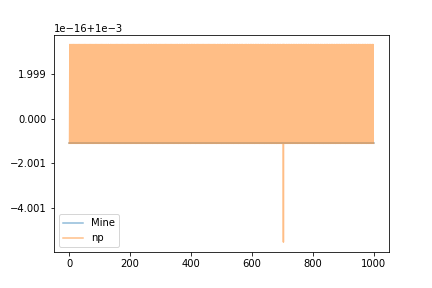

In [246]:
# Does much better  with ranges at the same order of magnitude and odd numbers of samples
ar = linspace(2,3,1001)
br = np.linspace(2,3,1001)
fig, ax = plt.subplots()
ax.plot(ar[1:]-ar[:-1], label="Mine", alpha=0.5)
ax.plot(br[1:]-br[:-1], label="np", alpha=0.5)
ax.legend()

## Hollow sphere

In [78]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0], 400+((y)*100)) for y in np.linspace(0,2.4, 5)],
    "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], 2, None, 1.5, 1)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [79]:
scene.run()

<IPython.core.display.Javascript object>


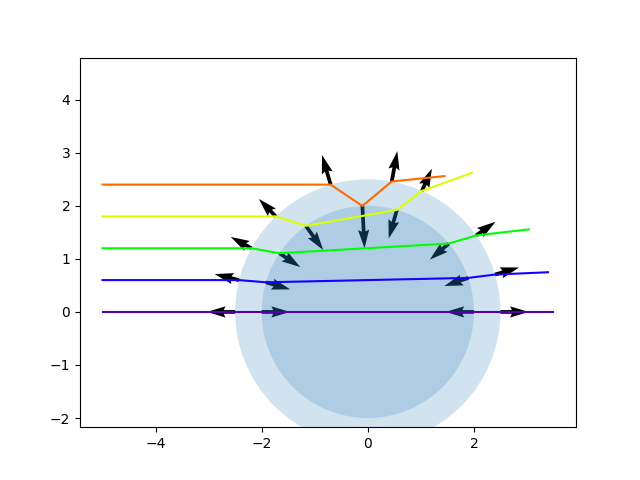

(-5.42500000001, 3.92500000021, -0.13106597768173464, 2.7523855313164276)

In [80]:
fig,ax = plt.subplots()
scene.plot(ax, m_quiver=True)
ax.axis("equal")

In [81]:
# The y component is expected to be negative - the hollow sphere is pushed out of the ray.
np.sum(scene.momenta, axis=0)

array([ 7.71982030e-05, -1.21044844e-04])

## Inner radius dependence

In [82]:
# Uncomment the commented lines to get a progress animation
# fig, ax = plt.subplots()
mms = []
rs = np.linspace(0.1,2.49,25)
for r in tqdm(rs):
    sc_dsc = {
        "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(0,2.4, 100)],
        "objects": [two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5), two_d_tracer.Sphere([0,0], r, None, 1.5, 1)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    mms.append(np.sum(scene.momenta, axis=0))
#     ax.clear()
#     scene.plot(ax, m_quiver=False)
#     ax.axis("equal")
#     fig.canvas.draw()
#     sleep(1)
mms = np.array(mms)

<IPython.core.display.Javascript object>


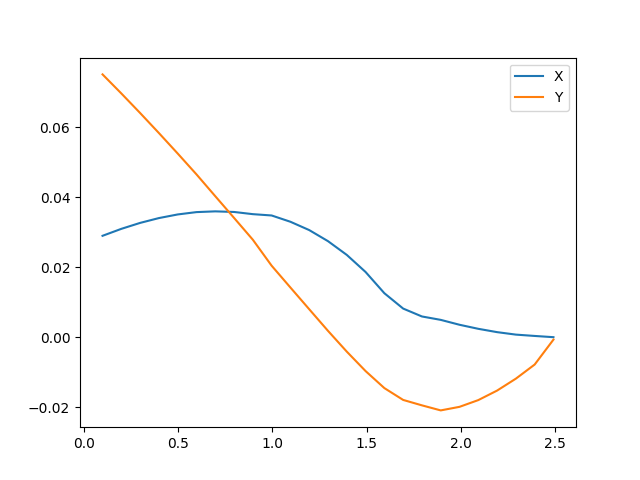

In [83]:
fig, ax = plt.subplots()
ax.plot(rs, mms[:,0], label="X")
ax.plot(rs, mms[:,1], label="Y")
ax.legend()

# Parabola

In [84]:
canvas = two_d_tracer.RayCanvas([0,1],[1,0],1)
sc_dsc = {
    "rays": [two_d_tracer.Ray([y, -0.5], [0,1]) for y in np.linspace(-2,2, 21)]+
            [two_d_tracer.Ray([y, 4], [0,-1], 600) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-4, y+0.3], [1,0], 500) for y in np.linspace(0.2,1.5, 11)],
    "objects": [two_d_tracer.ParabolaReflective(1,0,0), two_d_tracer.RayCanvas([0,5],[0,1]), canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [85]:
scene.run(limit=4)

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


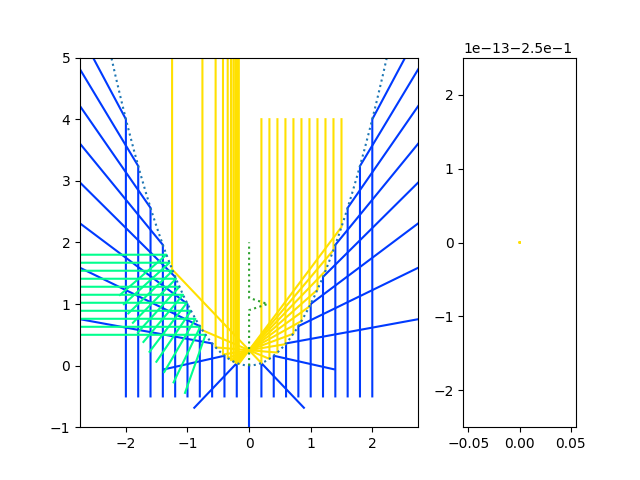

In [86]:
fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios":(3,1)})
scene.plot(ax[0])
ax[0].axis("equal")
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-1,5)
ax[1].scatter([0 for p in canvas.points], canvas.points, color=canvas.c, marker="x", s=0.2)

In [87]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y+0.3], [1,0]) for y in np.linspace(0.2,1.5, 11)]+
            [two_d_tracer.Ray([-2, 2.5], [1,0])],
    "objects": [two_d_tracer.Parabola(1,0,0, [-1.5,1.5], n_in=1.3)]
}
scene = two_d_tracer.Scene(**sc_dsc)

In [88]:
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


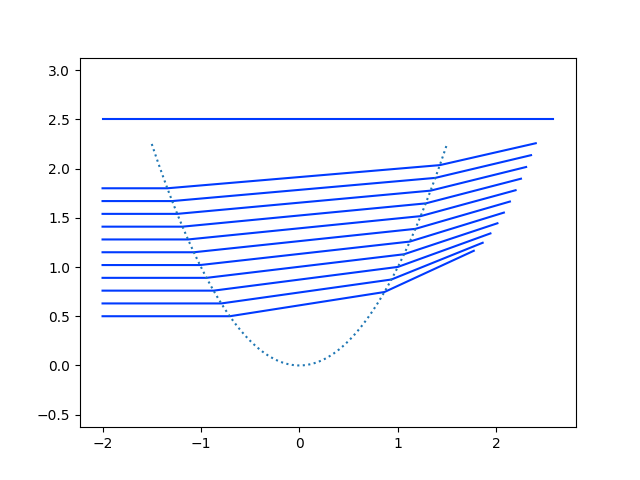

(-2.2290569415142096,
 2.8101957717983996,
 -0.1247589531680441,
 2.624988521579431)

In [89]:
fig,ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Line segments

In [90]:
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0]) for y in np.linspace(-2.5,2.5, 11)],
    "objects": [two_d_tracer.LineSegment([-2,-1], [2,1],n_in=1.5),
                two_d_tracer.LineSegmentReflective([1,-2], [3,-1]),
                two_d_tracer.LineSegment([3,1], [1,0], n_in=1.5)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


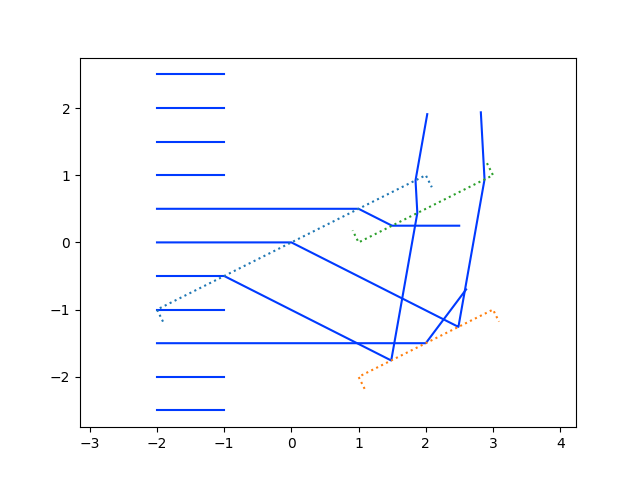

(-2.2544721359549995, 3.343914855054991, -2.75, 2.75)

In [91]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

# Prism v2: Line Segment Boogaloo

The results are consistent with the previous implementation

In [92]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(80)/2
sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 11)],
    "objects": [two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
                two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
                two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


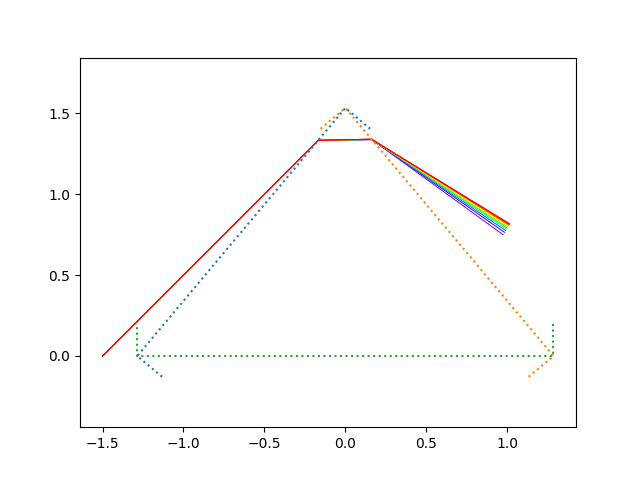

(-1.6392787609686539,
 1.4248539803417324,
 -0.2115898423460711,
 1.6151212066467193)

In [93]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7})
ax.axis("equal")

In [94]:
scene.rays

[Ray([0.97383245 0.74936007], [ 0.80959136 -0.5869939 ]),
 Ray([0.98322082 0.76387109], [ 0.81949095 -0.57309213]),
 Ray([0.99021145 0.77510048], [ 0.82689534 -0.56235585]),
 Ray([0.99561948 0.78405455], [ 0.83264433 -0.55380811]),
 Ray([0.9999278  0.79136429], [ 0.83723809 -0.54683854]),
 Ray([1.00344236 0.7974488 ], [ 0.84099501 -0.54104287]),
 Ray([1.00636689 0.80259844], [ 0.84412801 -0.53614168]),
 Ray([1.0088424  0.80702106], [ 0.84678499 -0.53193532]),
 Ray([1.01096961 0.81086938], [ 0.84907189 -0.52827732]),
 Ray([1.01282228 0.81425812], [ 0.85106657 -0.5250578 ]),
 Ray([1.01445566 0.81727504], [ 0.85282744 -0.52219283])]

# Object containers

In [95]:
# https://refractiveindex.info/?shelf=3d&book=glass&page=BK7
def n_glass(wavelength):
    x = wavelength * 1e-3 # The formula below works in micormeters
    return (1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    
prism_angle = rad(60)/2

prism1 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle),0], [0,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([0,2*np.cos(prism_angle)], [2*np.sin(prism_angle),0], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle),0], [-2*np.sin(prism_angle),0], n_in=n_glass)
])

d=1.5
prism2 = two_d_tracer.ObjectContainer([
    two_d_tracer.LineSegment([-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
    two_d_tracer.LineSegment([2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], [d,0], n_in=n_glass),
    two_d_tracer.LineSegment([d,0],[-2*np.sin(prism_angle)+d,2*np.cos(prism_angle)], n_in=n_glass),
], label="Prism 2")

sc_dsc = {
    "rays": [two_d_tracer.Ray([-1.5, 0], [1,1], wl) for wl in np.linspace(410,710, 5)],
    "objects": prism1.objects + prism2.objects
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

In [96]:
print(prism1)
print()
print(prism2)

ObjectContainer([Surface([-0.5        0.8660254], [-0.8660254  0.5      ]), Surface([0.5       0.8660254], [0.8660254 0.5      ]), Surface([0. 0.], [ 0. -1.])])

Prism 2: ObjectContainer([Surface([1.5        1.73205081], [0. 1.]), Surface([2.        0.8660254], [ 0.8660254 -0.5      ]), Surface([1.        0.8660254], [-0.8660254 -0.5      ])])


/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


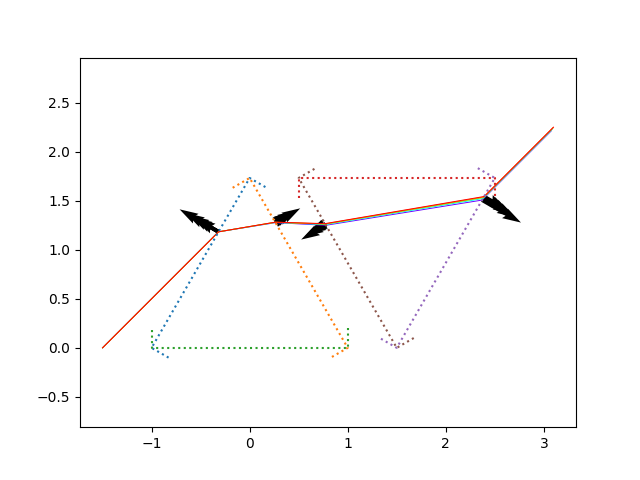

(-1.7299018246388964,
 3.3279383174168227,
 -0.21751211537659884,
 2.367754422908576)

In [97]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0.7}, m_quiver=True)
ax.axis("equal")

In [98]:
scene.momenta

array([[-0.00195842,  0.00113069],
       [-0.00163917,  0.00094638],
       [-0.00141077,  0.00081451],
       [-0.00123881,  0.00071523],
       [-0.00110445,  0.00063765],
       [ 0.00124731,  0.00072014],
       [ 0.00103711,  0.00059878],
       [ 0.00088894,  0.00051323],
       [ 0.00077839,  0.0004494 ],
       [ 0.00069253,  0.00039983],
       [ 0.00195842, -0.00113069],
       [ 0.00163917, -0.00094638],
       [ 0.00141077, -0.00081451],
       [ 0.00123881, -0.00071523],
       [ 0.00110445, -0.00063765],
       [-0.00124731, -0.00072014],
       [-0.00103711, -0.00059878],
       [-0.00088894, -0.00051323],
       [-0.00077839, -0.0004494 ],
       [-0.00069253, -0.00039983]])

In [99]:
prism1.momenta

array([[-0.00195842,  0.00113069],
       [-0.00163917,  0.00094638],
       [-0.00141077,  0.00081451],
       [-0.00123881,  0.00071523],
       [-0.00110445,  0.00063765],
       [ 0.00124731,  0.00072014],
       [ 0.00103711,  0.00059878],
       [ 0.00088894,  0.00051323],
       [ 0.00077839,  0.0004494 ],
       [ 0.00069253,  0.00039983]])

In [100]:
prism2.momenta

array([[ 0.00195842, -0.00113069],
       [ 0.00163917, -0.00094638],
       [ 0.00141077, -0.00081451],
       [ 0.00123881, -0.00071523],
       [ 0.00110445, -0.00063765],
       [-0.00124731, -0.00072014],
       [-0.00103711, -0.00059878],
       [-0.00088894, -0.00051323],
       [-0.00077839, -0.0004494 ],
       [-0.00069253, -0.00039983]])

In [101]:
prism1.momentum

array([-0.00270734,  0.00692584])

In [102]:
prism2.momentum

array([ 0.00270734, -0.00692584])

In [103]:
scene.momentum

array([ 3.03576608e-18, -6.50521303e-19])

In [104]:
scene.momentum - prism1.momentum - prism2.momentum

array([-4.33680869e-19,  8.67361738e-19])

# Angular momentum test

In [105]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [106]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([0,-1]), np.array([0,1])]
line.m_pos = [np.array([-0.5,0]), np.array([0.5,0])]
line.angular_momentum

1.0

In [107]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,-1]), np.array([1,1])]
line.m_pos = [np.array([-1,0]), np.array([1,0])]
line.angular_momentum

2.0

In [108]:
line = two_d_tracer.LineSegment([-2,0], [2,0])
line.momenta = [np.array([1,1]), np.array([-1,-1])]
line.m_pos = [np.array([-1,1]), np.array([1,-1])]
line.angular_momentum

-4.0

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


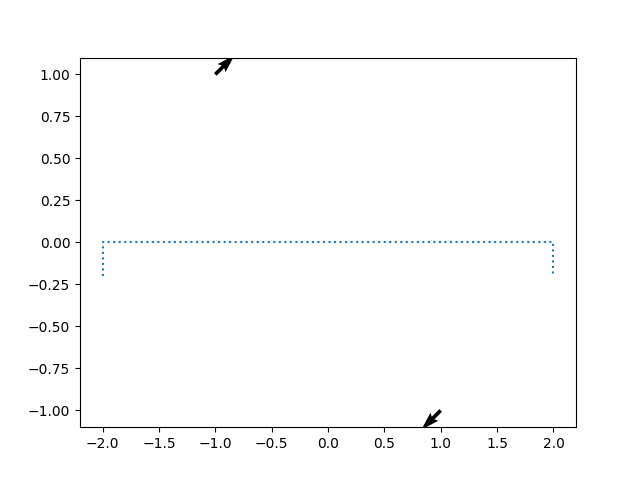

In [109]:
scene = two_d_tracer.Scene([], [line])
fig, ax = plt.subplots()
scene.plot(ax, m_quiver=True)

# Angular momentum for a sphere

In [110]:
sphere = two_d_tracer.Sphere([0,0], 2.5, None, 1, 1.5)
sc_dsc = {
    "rays": [two_d_tracer.Ray([-5, y], [1,0]) for y in np.linspace(1,2.6, 100)],
    "objects": [sphere]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


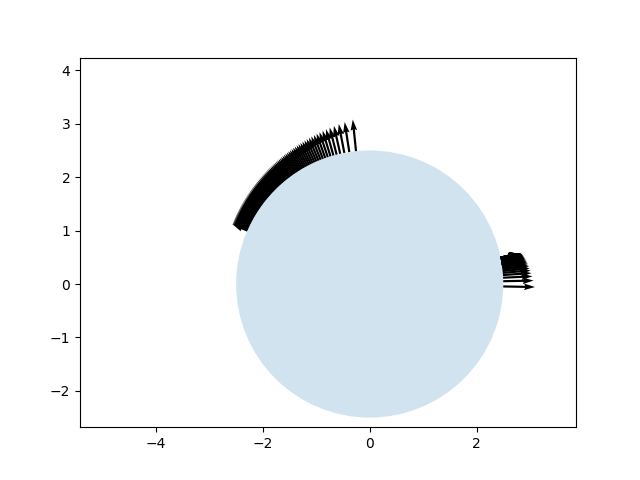

(-5.421980579819804,
 3.8615921762158907,
 -1.2239814140708973,
 2.7820943530509954)

In [111]:
fig, ax = plt.subplots()
scene.plot(ax, ray_kwargs={"lw":0}, m_quiver=True)
ax.axis("equal")

In [112]:
sphere.momentum

array([0.04629493, 0.11452869])

In [113]:
sphere.angular_momentum

-2.9219248548484344e-17

In [114]:
# The momentum and normal are parallel, but not quite
[np.dot(sphere.m_pos[0],sphere.momenta[0])/np.linalg.norm(sphere.m_pos[0])/np.linalg.norm(sphere.momenta[0]) for i in range(len(sphere.momenta))]

[1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000

# Angular momentum for a mirror

In [115]:
mirror = two_d_tracer.SurfaceReflective([0,0], [-1, 0])
sc_dsc = {
    "rays": [two_d_tracer.Ray([-2, y], [1,0.5]) for y in np.linspace(1,2.6, 25)],
    "objects": [mirror]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


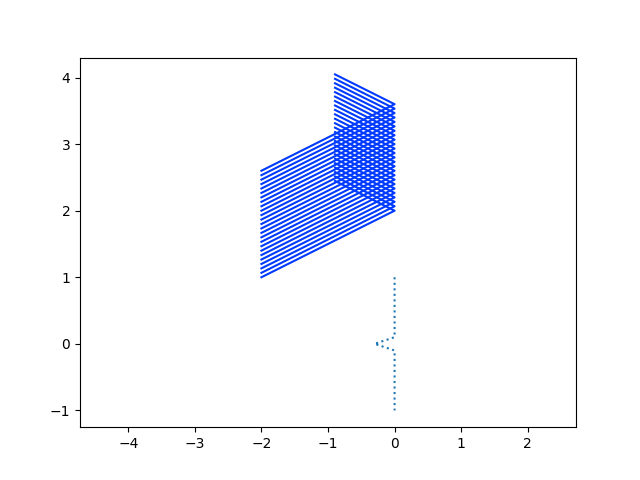

(-2.1, 0.1, -1.25236067977947, 4.2995742753688715)

In [116]:
fig, ax = plt.subplots()
scene.plot(ax)
ax.axis("equal")

In [117]:
mirror.angular_momentum

-0.2681366311348784

# Ray bundles

## Basic distribution test

In [118]:
bundle = two_d_tracer.RayBundle([0,0], [0,1], 10000, 1, 600, two_d_tracer.gaussian_randoms_factory(1), two_d_tracer.random_sign)

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


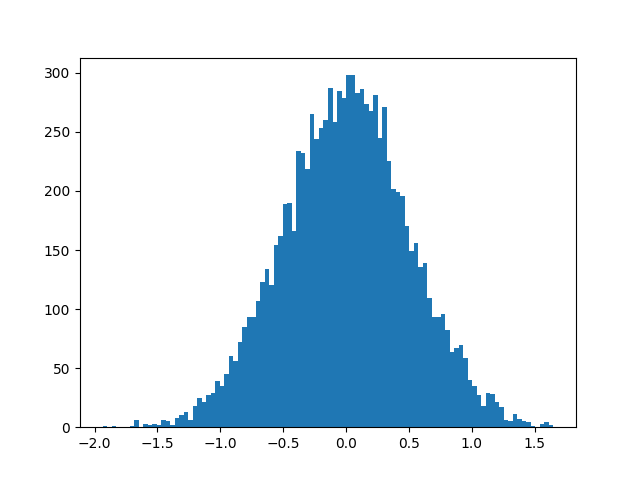

In [119]:
fig, ax = plt.subplots()
ax.hist([ray.origin[0] for ray in bundle.rays], bins=100)
plt.show()

In [120]:
canvas = two_d_tracer.RayCanvas([-2,0], [-1,0])
sc_dsc = {
    "rays": two_d_tracer.RayBundle([0,1.5], [0,-1], 100, 1, 600, two_d_tracer.gaussian_randoms_factory(0.5), two_d_tracer.random_sign).rays,
    "objects": [two_d_tracer.SurfaceReflective([0,0], [-1,1], radius=1),
                canvas]
}
scene = two_d_tracer.Scene(**sc_dsc)
scene.run()

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


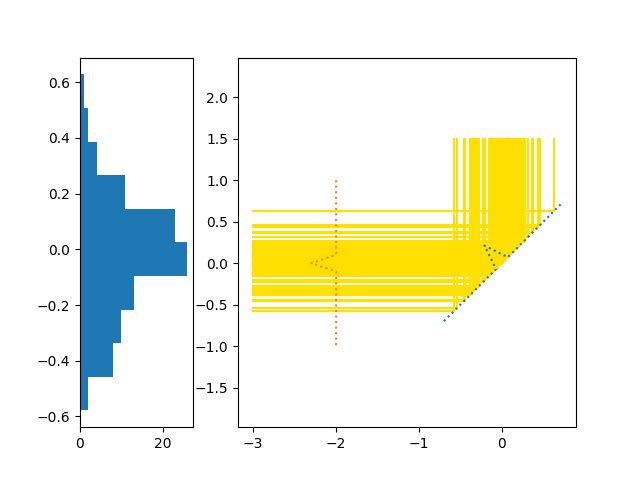

(array([ 2.,  8., 10., 13., 26., 23., 11.,  4.,  2.,  1.]),
 array([-0.57811182, -0.45753454, -0.33695727, -0.21638   , -0.09580273,
         0.02477455,  0.14535182,  0.26592909,  0.38650637,  0.50708364,
         0.62766091]),
 <a list of 10 Patch objects>)

In [121]:
fig, ax = plt.subplots(1,2, gridspec_kw={"width_ratios":(1,3)})
scene.plot(ax[1])
ax[1].axis("equal")
ax[0].hist(canvas.points, orientation="horizontal")

# Momentum transferred as a function of ray number

In [122]:
ms = []
ns = np.linspace(1e2,1e5,20).astype(int)
for n in tqdm(ns):
    bundle = two_d_tracer.RayBundle([-4,2], [1,0], n, 1, 600, two_d_tracer.gaussian_randoms_factory(4), two_d_tracer.random_sign)
    sc_dsc = {
        "rays": bundle.rays,
        "objects": [two_d_tracer.Sphere([0,0], 2, None, 1, n_glass)]
    }
    scene = two_d_tracer.Scene(**sc_dsc)
    scene.run()
    ms.append(scene.momentum)
ms = np.array(ms)

/home/jdranczewski/Documents/Imperial/UROP20/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


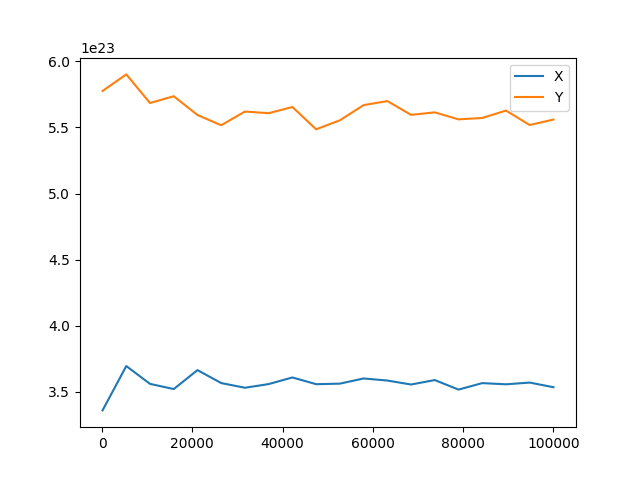

In [123]:
fig,ax = plt.subplots()
ax.plot(ns, ms[:,0], label="X")
ax.plot(ns, ms[:,1], label="Y")
ax.legend()